<a href="https://colab.research.google.com/github/Isaac-LaF/PHSX-Lab-2/blob/main/Inter%20and%20diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

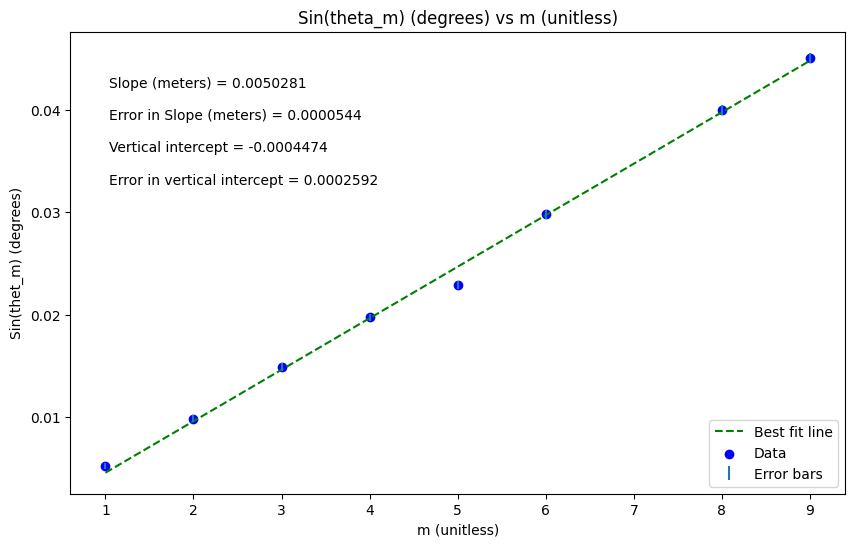

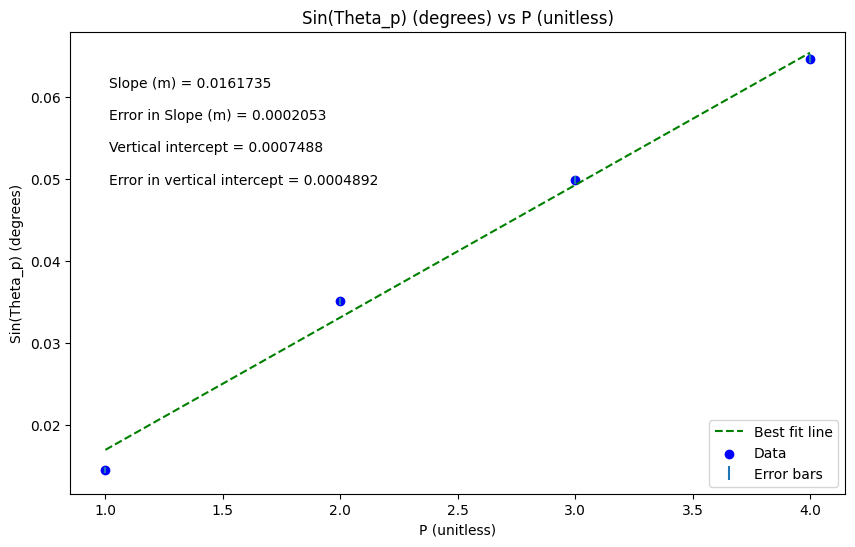

In [6]:
# Import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------- #
# Reusable plot function with optional annotation positions and legend location
def plot_data(
    x, y, dy, plot_title, x_label, y_label, slope_units,
    xpos=None, ypos=None, annotation_placement=1, legend_loc='best'
):
    # Best-fit line
    b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)
    fit = b + m * x

    # Error calculation
    def Delta(x, dy):
        return (sum(1/dy**2)) * (sum(x**2/dy**2)) - (sum(x/dy**2))**2

    D = Delta(x, dy)
    dm = np.sqrt(1/D * sum(1/dy**2))
    db = np.sqrt(1/D * sum(x**2/dy**2))

    def LLSFD2(x, y, dy):
        return sum(((y - b - m * x) / dy) ** 2)

    N = LLSFD2(x, y, dy)

    # Default annotation placement if not custom
    if xpos is None:
        xpos = 0.75 if annotation_placement in [1, 4] else 0.05
    if ypos is None:
        ypos = (
            [.85, .78, .71, .64] if annotation_placement in [1, 2]
            else [.3, .23, .16, .09]
        )

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, fit, color='green', linestyle='--', label='Best fit line')
    plt.scatter(x, y, color='blue', marker='o', label='Data')
    plt.errorbar(x, y, yerr=dy, fmt="none", label='Error bars')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    # Annotations
    plt.annotate(f"Slope ({slope_units}) = {m:.7f}", (xpos, ypos[0]), xycoords='axes fraction')
    plt.annotate(f"Error in Slope ({slope_units}) = {dm:.7f}", (xpos, ypos[1]), xycoords='axes fraction')
    plt.annotate(f"Vertical intercept = {b:.7f}", (xpos, ypos[2]), xycoords='axes fraction')
    plt.annotate(f"Error in vertical intercept = {db:.7f}", (xpos, ypos[3]), xycoords='axes fraction')

    # Legend location control
    plt.legend(loc=legend_loc)
    plt.show()

# --------------------------------------------- #
# Graph 1 Data
Sin_Theta_m = np.array([.00525, .00987, .01491, .01974, .02288, .02981, .04001, .0451])
m = np.array([ 1, 2, 3, 4, 5, 6, 8, 9])
err_Sin_Theta_m = np.array([.00032, .00034, .000361, .000381, .000394, .000423, .000466, .000487])

# Graph 1: Annotations up & left
plot_data(
    x= m,
    y= Sin_Theta_m,
    dy= err_Sin_Theta_m,
    plot_title='Sin(theta_m) (degrees) vs m (unitless)',
    x_label='m (unitless)',
    y_label='Sin(thet_m) (degrees)',
    slope_units='meters',
    xpos=0.05,
    ypos=[.88, .81, .74, .67],
    legend_loc='lower right'
)

# --------------------------------------------- #
# Graph 2 Data
Sin_Theta_p = np.array([.014488, .03505, .04992, .0647])
p = np.array([1, 2, 3, 4])
err_Sin_Theta_p = np.array([.000359, .000445, .000507, .000569])

# Graph 2: Annotations in top left, legend in bottom left
plot_data(
    x= p,
    y= Sin_Theta_p,
    dy= err_Sin_Theta_p,
    plot_title='Sin(Theta_p) (degrees) vs P (unitless)',
    x_label='P (unitless)',
    y_label='Sin(Theta_p) (degrees)',
    slope_units='m',
    xpos=0.05,
    ypos=[.88, .81, .74, .67],
    legend_loc='lower right'
)
